In [1]:
# Imports (if running in JupyterLite this might take a while)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from scipy.integrate import odeint

In [2]:
print("Enter ideas. You can enter them one-by-one, or enter them all at once, separated with a newline.")
ideas = []
answer = "exit"
while answer != "exit":
    answer = input()
    ideas.extend([idea for idea in answer.split('\n') if idea.strip() and idea != "exit"])

print(ideas)

Enter ideas. You can enter them one-by-one, or enter them all at once, separated with a newline.
[]


In [8]:
ideas = [
    "changes to Discord channels are not announced",
    "we don't check that our actions align with our values",
    "we haven't mapped the ecosystem well enough for me to know where to apply for grants",
    "members cannot refrain from offending others with different opinions",
    "large groups have less clear structures and responsibilities, too many discussions in large groups",
    "limited commericial focus provides insufficient monetary rewards",
    "it's difficult to coordinate meetings",
    "it's difficult to find information on Discord",
    "there's no prescribed activities to facilitate team building",
    "there's no dedicated space for ideation",

    "not all people adhere to agreed-upon rules",
    "there's no one toolset that contains all relevant advices and services",
    "I don't know where information is in the multiple tools and there's information asymmetry among members",
    "important decisions take place at a very slow pace",
    "we spend too much time discussing instead of testing and iterating",
    "it is difficult to separate good contribution from just being vocal in threads",
    "there's too much focus on creating and modifying processes",
    "there are too many sychronous and standing meetings",
    "onboarding process is too complicated and not permissionless",
    "insufficient funding and compensation",

    "we don't use retrospectives to get better at working together",
    "the proposal process is not working",
    "there's no stable foundation - like playbooks for fundraising and governance",
    "governance is dysfunctional due to lack of consensus, some members lack comittment to complete tasks",
    "there's no infrastructure developer for my unit",
    "meetings take too long",
    "there's lack of visibility into each other's availability",
    "there's no compensation plan for contributors",
    "RnDAO lacks visibility to Web3 community",
    "there's no incubation space for ideas due to privacy concerns",
    
    "there's a lack of legal wrapper"
]

# Initialize CountVectorizer to convert text into numerical vectors
count_vectorizer = CountVectorizer()

# Fit and transform the text data to numerical vectors
idea_matrix = count_vectorizer.fit_transform(ideas)

# Convert the idea matrix to a numpy array for easier calculations
idea_array = idea_matrix.toarray()

# Calculate the centroid (mean) of the idea array along axis 0 (rows)
centroid = np.mean(idea_array, axis=0)
# print('Centroid: ', centroid)

# Calculate cosine similarity between each idea and the centroid
cos_similarity = cosine_similarity(idea_array, centroid.reshape(1, -1))

# Calculate cosine similarity between the ideas
# pairwise_similarity = cosine_similarity(idea_matrix, idea_matrix)

# Calculate pairwise distances between the ideas
pairwise_distance = pairwise_distances(idea_array, metric='cosine')

# make it so that 0 is 'same' and 1 is very different:
distance_to_centroid = 1 - cos_similarity


### Print info
# Create an object with the similarity scores for each idea
print('Cosine similarity: ')
for row in cos_similarity:
    print("{:.2f}".format(*row), sep='')

print('Distance to centroid: (-1 * x): ')
for row in distance_to_centroid:
    print("{:.2f}".format(*row), sep='')

ideas_and_similarities = [{"idea": ideas[i], "dist": distance_to_centroid[i][0]} for i in range(len(ideas))]


Cosine similarity: 
0.30
0.18
0.44
0.14
0.27
0.11
0.34
0.34
0.43
0.41
0.28
0.38
0.42
0.12
0.31
0.33
0.40
0.42
0.34
0.23
0.30
0.23
0.44
0.43
0.38
0.20
0.30
0.41
0.26
0.49
0.33
Distance to centroid: (-1 * x): 
0.70
0.82
0.56
0.86
0.73
0.89
0.66
0.66
0.57
0.59
0.72
0.62
0.58
0.88
0.69
0.67
0.60
0.58
0.66
0.77
0.70
0.77
0.56
0.57
0.62
0.80
0.70
0.59
0.74
0.51
0.67


### MDS MultiDimensional Scaling
Not quite working yet, but might be a good way if we can transform the data properly.

395596


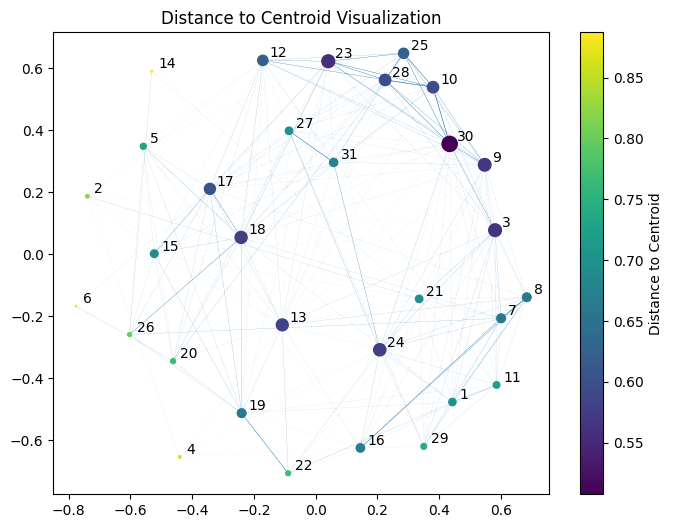

In [13]:
r_state = np.random.RandomState()
r_int = r_state.randint(1, 1000000)
mds = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=811039)
print(r_int)

coords = mds.fit_transform(pairwise_distance)
fig, ax = plt.subplots(figsize=(8, 6))

# Normalize the distance_to_centroid array for marker size scaling
marker_sizes = pow((1 - distance_to_centroid), 3) * 1000

scatter = ax.scatter(coords[:, 0], coords[:, 1], c=distance_to_centroid, cmap='viridis', s=marker_sizes)

##### Connection Lines


# Plot the edges
segments = []
line_weights = []
for i in range(len(coords)):
    for j in range(len(coords)):
        segments.append([coords[i], coords[j]])
        line_weights.append(pow(pairwise_similarity[i,j], 2))

# np.fill_diagonal(line_weights, 0)
# values = np.abs(line_weights)
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.Blues, norm=plt.Normalize(0, 1), linewidths=line_weights
)
ax.add_collection(lc)



# Create line segments and customize their properties
# seg = []
# linewi = []
# for i in range(len(coords)):
#     for j in range(i + 1, len(coords)):
#         seg.append([coords[i], coords[j]])
#         linewi.append(5 * (1 - pairwise_distance[i, j]))  # Adjust the scaling factor as needed

# # Create a LineCollection and add it to the axis
# line_segments = LineCollection(seg, linewidths=linewi, colors='k')
# ax.add_collection(line_segments)

# Add labels to each point
labels = []
for i, dist in enumerate(coords):
    # text = f"{i}: {txt[:5]}..." if len(txt) > 5 else txt
    dist_round = round(dist[0], 2)
    text = f"{i+1}"
    label = ax.annotate(text, (coords[i, 0], coords[i, 1]), xytext=(7, 3), textcoords='offset pixels')
    labels.append(label)

# Adjust labels to prevent overlap - doesn't quite work though
# adjust_text(labels, arrowprops=dict(arrowstyle='->', color='black'))

##### /end

# Add a colorbar to show the mapping of colors to distances
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Distance to Centroid')

# Set the axis labels and title
ax.set_title('Distance to Centroid Visualization')

# Show the plot
plt.show()




In [5]:
print(f"# \t dist to center \t coords")
for i, item in enumerate(ideas_and_similarities):
    print(f"{i+1} \t {round(item["dist"], 2)} \t ({round(coords[i][0], 2)}|{round(coords[i][1], 2)})")

for x, y in coords:
    print(f"({round(x, 2)}|{round(y, 2)})")

# 	 dist to center 	 coords
1 	 0.7 	 (0.44|-0.48)
2 	 0.82 	 (-0.74|0.19)
3 	 0.56 	 (0.58|0.08)
4 	 0.86 	 (-0.44|-0.65)
5 	 0.73 	 (-0.56|0.35)
6 	 0.89 	 (-0.78|-0.17)
7 	 0.66 	 (0.6|-0.21)
8 	 0.66 	 (0.68|-0.14)
9 	 0.57 	 (0.55|0.29)
10 	 0.59 	 (0.38|0.54)
11 	 0.72 	 (0.59|-0.42)
12 	 0.62 	 (-0.17|0.63)
13 	 0.58 	 (-0.11|-0.23)
14 	 0.88 	 (-0.53|0.59)
15 	 0.69 	 (-0.52|0.0)
16 	 0.67 	 (0.15|-0.62)
17 	 0.6 	 (-0.34|0.21)
18 	 0.58 	 (-0.24|0.05)
19 	 0.66 	 (-0.24|-0.51)
20 	 0.77 	 (-0.46|-0.34)
21 	 0.7 	 (0.34|-0.14)
22 	 0.77 	 (-0.09|-0.71)
23 	 0.56 	 (0.04|0.62)
24 	 0.57 	 (0.21|-0.31)
25 	 0.62 	 (0.29|0.65)
26 	 0.8 	 (-0.6|-0.26)
27 	 0.7 	 (-0.09|0.4)
28 	 0.59 	 (0.23|0.56)
29 	 0.74 	 (0.35|-0.62)
30 	 0.51 	 (0.43|0.36)
31 	 0.67 	 (0.06|0.3)
(0.44|-0.48)
(-0.74|0.19)
(0.58|0.08)
(-0.44|-0.65)
(-0.56|0.35)
(-0.78|-0.17)
(0.6|-0.21)
(0.68|-0.14)
(0.55|0.29)
(0.38|0.54)
(0.59|-0.42)
(-0.17|0.63)
(-0.11|-0.23)
(-0.53|0.59)
(-0.52|0.0)
(0.15|-0.62)
(-0.34|0.21

### Heatmap
Difficult to read properly. There's surely something better. (See other attempts below)

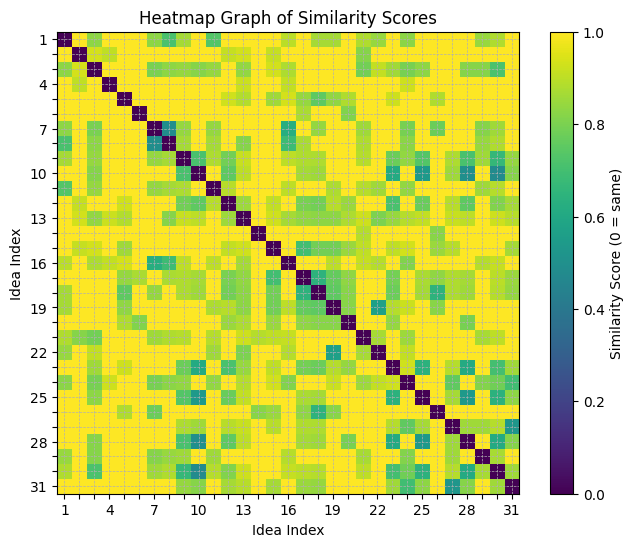

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(pairwise_distance, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity Score (0 = same)')
plt.title('Heatmap Graph of Similarity Scores')

n = 3  # Show every nth label
start = 1  # Start from this value
length = len(pairwise_distance)
end = length + start  # End at this value
labels = np.arange(start, end, n)  # Generate the labels

# Set the x-ticks and labels
len_aranged = np.arange(length)

# Create a list of empty strings for the unlabeled ticks
all_labels = ['' for _ in range(length)]

# Assign the generated labels to the appropriate positions
for i, label in enumerate(labels):
    all_labels[i * n] = str(label)

# Set the x-ticks and labels
ax.set_xticks(len_aranged)
ax.set_xticklabels(all_labels)

ax.set_yticks(len_aranged)
ax.set_yticklabels(all_labels)

plt.xlabel('Idea Index')
plt.ylabel('Idea Index')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
# as_html = mpld3.fig_to_html(fig, include_libraries=False, template_type="simple")
# plt.savefig('static/plot.png')
# plt.close(fig)
plt.show()

### Networkx Graph
Not really suitable, but we might be able to improve something?

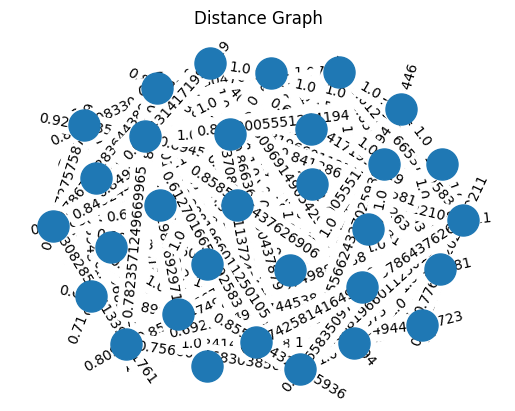

In [7]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes to the graph
num_nodes = pairwise_distance.shape[0]
for i in range(num_nodes):
    G.add_node(i)

#Add edges based on distance matrix
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = pairwise_distance[i][j]
        G.add_edge(i, j, weight=weight)

# Position nodes using spring layout
coords = nx.spring_layout(G)

#Draw nodes
nx.draw_networkx_nodes(G, coords, node_size=500)

#Draw edges with weights
nx.draw_networkx_edges(G, coords)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, coords, edge_labels=edge_labels)

#Display the graph
plt.title('Distance Graph')
plt.axis('off')
plt.show()